In [1]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import dask.dataframe as dd
import numpy as np
import tensorflow as tf


## EDA (Exploratory Data Analysis)

In [2]:

# Load the TSV file into a DataFrame
file_path = "Resources/GSE139495_Single_cell_metaData_10252019.tsv"  # Update with the correct path if needed
df = pd.read_csv(file_path, sep="\t")

# Display the first few rows
df.head(50)


,cells,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,alra_snn_res.0.5,seurat_clusters,samples
0,ACAGCTAAGGGTTCCC,Unfiltered_control,7,4,0.000000,9,9,Unfiltered_control
1,ACATACGTCATTTGGG,Unfiltered_control,7,7,0.036010,9,9,Unfiltered_control
2,ACATCAGAGTCGTACT,Unfiltered_control,11,6,0.000000,9,9,Unfiltered_control
3,AGAGTGGGTGCAACTT,Unfiltered_control,7,4,0.150754,9,9,Unfiltered_control
4,AGGCCACGTTCGCGAC,Unfiltered_control,9,2,0.000000,9,9,Unfiltered_control
5,AGTGGGACATCCGGGT,Unfiltered_control,9,4,0.000000,9,9,Unfiltered_control
6,ATCACGAGTCCAGTTA,Unfiltered_control,8,8,0.000000,9,9,Unfiltered_control
7,ATCATGGGTCCGACGT,3,9,8,0.000000,9,9,Filtered_samples
8,ATTACTCCAGATCTGT,Unfiltered_control,12,5,0.000000,9,9,Unfiltered_control
9,CAAGATCGTCCATCCT,3,13,5,0.000000,9,9,Filtered_samples


In [3]:
#return the number of rows in a DataFrame df
len(df)

12330

In [4]:
# Drops all rows with NaN values
df_cleaned = df.dropna()  # Drops all rows with NaN values
len(df_cleaned)


12330

# Quality control pass
* nCount_RNA should be 500-20000,
* nFeature_RNA should be 200-3000
* percent.mt should be less than 10%

In [5]:
# Filter the DataFrame with Quality control measurements to include rows where 'nCount_RNA' is between 500 and 20000
metadata_filtered_nCount = df_cleaned[(df_cleaned['nCount_RNA'] > 500) & (df_cleaned['nCount_RNA'] < 20000)]

# Display summary information about the filtered DataFrame
metadata_filtered_nCount.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 40 to 12275
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cells             12097 non-null  object 
 1   orig.ident        12097 non-null  object 
 2   nCount_RNA        12097 non-null  int64  
 3   nFeature_RNA      12097 non-null  int64  
 4   percent.mt        12097 non-null  float64
 5   alra_snn_res.0.5  12097 non-null  int64  
 6   seurat_clusters   12097 non-null  int64  
 7   samples           12097 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 850.6+ KB


In [6]:
# Filter the DataFrame 'metadata_filtered_nCount' to include only rows where 'nFeature_RNA' is between 200 and 3000
metadata_filtered_nFeature = metadata_filtered_nCount[(metadata_filtered_nCount['nFeature_RNA']>200) & (metadata_filtered_nCount['nFeature_RNA']<3000)]

# Display summary information about the filtered DataFrame
metadata_filtered_nFeature.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11998 entries, 40 to 12275
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cells             11998 non-null  object 
 1   orig.ident        11998 non-null  object 
 2   nCount_RNA        11998 non-null  int64  
 3   nFeature_RNA      11998 non-null  int64  
 4   percent.mt        11998 non-null  float64
 5   alra_snn_res.0.5  11998 non-null  int64  
 6   seurat_clusters   11998 non-null  int64  
 7   samples           11998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 843.6+ KB


In [7]:
# Filter the DataFrame to include only rows where 'percent.mt' is less than 10, indicating good mitochondrial DNA quality
metadata_filtered_percentMT = metadata_filtered_nFeature[(metadata_filtered_nFeature['percent.mt'] < 10)]

# Display summary information about the filtered DataFrame
metadata_filtered_percentMT.info()
print("In terms of mitochondrial DNA, the quality was very good")


<class 'pandas.core.frame.DataFrame'>
Index: 11998 entries, 40 to 12275
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cells             11998 non-null  object 
 1   orig.ident        11998 non-null  object 
 2   nCount_RNA        11998 non-null  int64  
 3   nFeature_RNA      11998 non-null  int64  
 4   percent.mt        11998 non-null  float64
 5   alra_snn_res.0.5  11998 non-null  int64  
 6   seurat_clusters   11998 non-null  int64  
 7   samples           11998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 843.6+ KB
In terms of mitochondrial DNA, the quality was very good


## Identify the data

In [8]:
# Convert the filtered DataFrame back to a regular DataFrame
df1 = metadata_filtered_percentMT.copy()


In [9]:
# Get the column labels of the DataFrame
df1.columns


Index(['cells', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt',
       'alra_snn_res.0.5', 'seurat_clusters', 'samples'],
      dtype='object')

In [10]:
# Display summary information about the DataFrame
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11998 entries, 40 to 12275
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cells             11998 non-null  object 
 1   orig.ident        11998 non-null  object 
 2   nCount_RNA        11998 non-null  int64  
 3   nFeature_RNA      11998 non-null  int64  
 4   percent.mt        11998 non-null  float64
 5   alra_snn_res.0.5  11998 non-null  int64  
 6   seurat_clusters   11998 non-null  int64  
 7   samples           11998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 843.6+ KB


In [11]:
# Get the data types of each column
df1.dtypes


cells                object
orig.ident           object
nCount_RNA            int64
nFeature_RNA          int64
percent.mt          float64
alra_snn_res.0.5      int64
seurat_clusters       int64
samples              object
dtype: object

In [12]:
# Function to count unique values in each column
def group_common_values(df1):
    for col in df.columns:
        print(f"\nColumn: {col}")
        print(df[col].value_counts())  # Count occurrences of unique values

# Apply the function
group_common_values(df1)


Column: cells
cells
TTTACTGCATCCCACT    1
ACAGCTAAGGGTTCCC    1
ACATACGTCATTTGGG    1
ACATCAGAGTCGTACT    1
AGAGTGGGTGCAACTT    1
                   ..
CGCTATCAGCACGCCT    1
CCTTCCCGTACACCGC    1
CAGCTGGGTGTATGGG    1
CAGCCGAAGATGTTAG    1
CACCTTGTCAGAAATG    1
Name: count, Length: 12330, dtype: int64

Column: orig.ident
orig.ident
Unfiltered_control    8457
11                    1641
8,9,10                1124
3                      754
1                      296
2                       29
5                       17
4                        7
6                        3
7                        1
Failed_capture           1
Name: count, dtype: int64

Column: nCount_RNA
nCount_RNA
5       18
9       17
7       14
8       13
12      12
        ..
8177     1
1678     1
841      1
6596     1
8673     1
Name: count, Length: 5799, dtype: int64

Column: nFeature_RNA
nFeature_RNA
1119    22
1123    21
1153    20
1130    20
1131    20
        ..
230      1
359      1
1837     1
234      1
4138 

In [13]:
# Save the DataFrame df1 to a CSV file named 'df1.csv'
# index=False ensures that the index is not written to the file
df1.to_csv('Resources/1.0df1.csv', index=False)


In [14]:
# # Import LabelEncoder from scikit-learn to convert categorical labels to numeric values
# from sklearn.preprocessing import LabelEncoder

# # Create an instance of LabelEncoder
# le = LabelEncoder()

# # Apply the label encoder to the 'cells' column and transform categorical values into numeric labels
# #df['cells'] = le.fit_transform(df['cells'])

# # Uncomment the following line to transform the 'orig.ident' column in the same way
# # df['orig.ident'] = le.fit_transform(df['orig.ident'])


# Reset the values

In [15]:
# Rename columns in the DataFrame: 'orig.ident' to 'patient' and 'percent.mt' to 'percent'
df_renamed = df1.rename(columns = {'orig.ident': 'patient', 'percent.mt': 'percent'})

# Display the first 20 rows of the renamed DataFrame
df_renamed.head()


,cells,patient,nCount_RNA,nFeature_RNA,percent,alra_snn_res.0.5,seurat_clusters,samples
40,AAACCTGAGCATCATC,Unfiltered_control,2322,834,3.875969,5,5,Unfiltered_control
41,AAACCTGAGCTAACTC,Unfiltered_control,1652,785,5.871671,1,1,Unfiltered_control
42,AAACCTGAGCTAGTGG,Unfiltered_control,4357,1261,1.973835,2,2,Unfiltered_control
43,AAACCTGCACATTAGC,Unfiltered_control,2681,852,1.454681,0,0,Unfiltered_control
44,AAACCTGCACTGTTAG,Unfiltered_control,4514,1475,3.655295,1,1,Unfiltered_control


In [16]:

# Count common values in 'cells' and 'patient'
cell_counts = df_renamed["cells"].value_counts()
orig_ident_counts = df_renamed["patient"].value_counts()

# Display results
print("Common values in 'cells':")
print(cell_counts)

print("\nCommon values in 'orig.ident':")
orig_ident_counts

Common values in 'cells':
cells
TTTGTCATCGAGAACG    1
AAACCTGAGCATCATC    1
AAACCTGAGCTAACTC    1
AAACCTGAGCTAGTGG    1
AAACCTGCACATTAGC    1
                   ..
AAACCTGTCTCAAGTG    1
AAACCTGTCTACCAGA    1
AAACCTGTCGTGGACC    1
AAACCTGTCGCCAAAT    1
AAACCTGTCCTGTAGA    1
Name: count, Length: 11998, dtype: int64

Common values in 'orig.ident':


patient
Unfiltered_control    8246
11                    1607
8,9,10                1101
3                      736
1                      277
2                       24
5                        4
7                        1
4                        1
6                        1
Name: count, dtype: int64

In [17]:
# 'dfdf_renamed2' is being assigned the same data as 'df_renamed'.
# This means 'dfdf_renamed2' will reference the same DataFrame object as 'df_renamed'.
# Any changes made to 'dfdf_renamed2' will also affect 'df_renamed' unless explicitly copied.
dfdf_renamed2 = df_renamed
dfdf_renamed2

,cells,patient,nCount_RNA,nFeature_RNA,percent,alra_snn_res.0.5,seurat_clusters,samples
40,AAACCTGAGCATCATC,Unfiltered_control,2322,834,3.875969,5,5,Unfiltered_control
41,AAACCTGAGCTAACTC,Unfiltered_control,1652,785,5.871671,1,1,Unfiltered_control
42,AAACCTGAGCTAGTGG,Unfiltered_control,4357,1261,1.973835,2,2,Unfiltered_control
43,AAACCTGCACATTAGC,Unfiltered_control,2681,852,1.454681,0,0,Unfiltered_control
44,AAACCTGCACTGTTAG,Unfiltered_control,4514,1475,3.655295,1,1,Unfiltered_control
...,...,...,...,...,...,...,...,...
12271,TTTCCTCTCCTGTAGA,3,7297,1872,3.768672,1,1,Filtered_samples
12272,TTTGCGCAGTAGCGGT,3,2263,711,2.430402,0,0,Filtered_samples
12273,TTTGGTTTCAGCCTAA,3,4676,1107,3.485885,2,2,Filtered_samples
12274,TTTGTCATCCACGAAT,3,2878,1015,2.675469,6,6,Filtered_samples


In [18]:
# Replace the value 'Unfiltered_control' in the 'patient' column with '0'
dfdf_renamed2['patient'] = dfdf_renamed2['patient'].replace({'Unfiltered_control': '0', '1': '0'})
dfdf_renamed2

,cells,patient,nCount_RNA,nFeature_RNA,percent,alra_snn_res.0.5,seurat_clusters,samples
40,AAACCTGAGCATCATC,0,2322,834,3.875969,5,5,Unfiltered_control
41,AAACCTGAGCTAACTC,0,1652,785,5.871671,1,1,Unfiltered_control
42,AAACCTGAGCTAGTGG,0,4357,1261,1.973835,2,2,Unfiltered_control
43,AAACCTGCACATTAGC,0,2681,852,1.454681,0,0,Unfiltered_control
44,AAACCTGCACTGTTAG,0,4514,1475,3.655295,1,1,Unfiltered_control
...,...,...,...,...,...,...,...,...
12271,TTTCCTCTCCTGTAGA,3,7297,1872,3.768672,1,1,Filtered_samples
12272,TTTGCGCAGTAGCGGT,3,2263,711,2.430402,0,0,Filtered_samples
12273,TTTGGTTTCAGCCTAA,3,4676,1107,3.485885,2,2,Filtered_samples
12274,TTTGTCATCCACGAAT,3,2878,1015,2.675469,6,6,Filtered_samples


In [19]:
dfdf_renamed2.to_csv('Resources/1.0dfdf_renamed2.csv', index=False)


---------------------------

# Patient data description
* non metastasis = 0
* metastasis = 1

In [20]:
# Save the DataFrame 'dfdf_renamed2' as a CSV file in the 'Resources' directory.
# The file will be saved with the name '1.0dfdf_renamed2.csv'.
# The 'index=False' parameter ensures that the row indices are not included in the CSV file.
dfdf_renamed2.to_csv('Resources/1.0dfdf_renamed2.csv', index=False)


In [21]:
# look through patient column 
df_renamed['patient'].unique()


array(['0', '4', '6', '7', '5', '8,9,10', '2', '11', '3'], dtype=object)

In [22]:
# Replace the value 'Unfiltered_control' in the 'patient' column with '0'
df_renamed['patient'] = df_renamed['patient'].replace({'Unfiltered_control': '0', '1': '0'})


In [23]:
# Get the unique values in the 'patient' column after renamed
df_renamed['patient'].unique()


array(['0', '4', '6', '7', '5', '8,9,10', '2', '11', '3'], dtype=object)

In [24]:
# Replace values different than '0' with '1'
df_renamed['patient'] = df_renamed['patient'].apply(lambda x: '1' if x != '0' else '0')

# Drop rows where the 'patient' column has the value 'Failed_capture'
df_renamed = df_renamed[df_renamed['patient'] != 'Failed_capture']

# Check the unique values in the 'patient' column
df_renamed['patient'].unique()


array(['0', '1'], dtype=object)

In [25]:
# Get the unique values in the 'samples' column
df_renamed['samples'].unique()


array(['Unfiltered_control', 'Filtered_samples', 'Unfiltered_sample'],
      dtype=object)

In [26]:
# Get the unique values in the 'patient' column
df_renamed['patient'].unique()


array(['0', '1'], dtype=object)

In [27]:
df_renamed

,cells,patient,nCount_RNA,nFeature_RNA,percent,alra_snn_res.0.5,seurat_clusters,samples
40,AAACCTGAGCATCATC,0,2322,834,3.875969,5,5,Unfiltered_control
41,AAACCTGAGCTAACTC,0,1652,785,5.871671,1,1,Unfiltered_control
42,AAACCTGAGCTAGTGG,0,4357,1261,1.973835,2,2,Unfiltered_control
43,AAACCTGCACATTAGC,0,2681,852,1.454681,0,0,Unfiltered_control
44,AAACCTGCACTGTTAG,0,4514,1475,3.655295,1,1,Unfiltered_control
...,...,...,...,...,...,...,...,...
12271,TTTCCTCTCCTGTAGA,1,7297,1872,3.768672,1,1,Filtered_samples
12272,TTTGCGCAGTAGCGGT,1,2263,711,2.430402,0,0,Filtered_samples
12273,TTTGGTTTCAGCCTAA,1,4676,1107,3.485885,2,2,Filtered_samples
12274,TTTGTCATCCACGAAT,1,2878,1015,2.675469,6,6,Filtered_samples


In [28]:
df_renamed.to_csv('Resources/2.2df_renamed.csv', index=False)


# Sample column description 
* Unfiltered_control = 0
* Filtered_samples = 1
* Unfiltered_sample = 2

In [29]:
# Replace specific values in the 'samples' column with new labels: 
# 'Unfiltered_control' → '0', 'Filtered_samples' → '1', 'Unfiltered_sample' → '2'
df_renamed['samples'] = df_renamed['samples'].replace({'Unfiltered_control': '0', 'Filtered_samples': '1', 'Unfiltered_sample': '2'})

# Display the updated DataFrame
df_renamed


,cells,patient,nCount_RNA,nFeature_RNA,percent,alra_snn_res.0.5,seurat_clusters,samples
40,AAACCTGAGCATCATC,0,2322,834,3.875969,5,5,0
41,AAACCTGAGCTAACTC,0,1652,785,5.871671,1,1,0
42,AAACCTGAGCTAGTGG,0,4357,1261,1.973835,2,2,0
43,AAACCTGCACATTAGC,0,2681,852,1.454681,0,0,0
44,AAACCTGCACTGTTAG,0,4514,1475,3.655295,1,1,0
...,...,...,...,...,...,...,...,...
12271,TTTCCTCTCCTGTAGA,1,7297,1872,3.768672,1,1,1
12272,TTTGCGCAGTAGCGGT,1,2263,711,2.430402,0,0,1
12273,TTTGGTTTCAGCCTAA,1,4676,1107,3.485885,2,2,1
12274,TTTGTCATCCACGAAT,1,2878,1015,2.675469,6,6,1


In [30]:
# Get the unique values in the 'percent' column
df_renamed['percent'].unique()


array([3.87596899, 5.8716707 , 1.97383521, ..., 3.48588537, 2.67546908,
       3.85745775])

In [31]:
# Round the values in the 'percent' column to 4 decimal places
df_renamed['percent'] = df_renamed['percent'].round(4)

# Display the first 10 rows of the updated DataFrame
df_renamed.head(10)


,cells,patient,nCount_RNA,nFeature_RNA,percent,alra_snn_res.0.5,seurat_clusters,samples
40,AAACCTGAGCATCATC,0,2322,834,3.8760,5,5,0
41,AAACCTGAGCTAACTC,0,1652,785,5.8717,1,1,0
42,AAACCTGAGCTAGTGG,0,4357,1261,1.9738,2,2,0
43,AAACCTGCACATTAGC,0,2681,852,1.4547,0,0,0
44,AAACCTGCACTGTTAG,0,4514,1475,3.6553,1,1,0
45,AAACCTGCATAGTAAG,0,4259,1443,3.8741,1,1,0
46,AAACCTGCATGAACCT,0,3087,1209,3.8225,4,4,0
47,AAACCTGGTAAGAGGA,0,5036,1389,3.1176,2,2,0
48,AAACCTGGTAGAAGGA,0,5277,1582,4.1311,1,1,0
49,AAACCTGGTCCAGTGC,0,4276,1086,3.2039,0,0,0


In [32]:
# Convert the 'patient' column to int32
df_renamed['patient'] = df_renamed['patient'].astype('int32')
df_renamed['samples'] = df_renamed['samples'].astype('int32')

# Verify the change in data types
print(df_renamed.dtypes)


cells                object
patient               int32
nCount_RNA            int64
nFeature_RNA          int64
percent             float64
alra_snn_res.0.5      int64
seurat_clusters       int64
samples               int32
dtype: object


--------------------------------------

# Convert datatypes to ease memory processing 

In [33]:
# Convert the 'patient' column to category type, then to numeric codes
df_renamed['patient'] = df_renamed['patient'].astype('category').cat.codes

# Now check the data type
print(df_renamed['patient'].dtype)  # Should be int32
df_renamed.head(10)


int8


,cells,patient,nCount_RNA,nFeature_RNA,percent,alra_snn_res.0.5,seurat_clusters,samples
40,AAACCTGAGCATCATC,0,2322,834,3.8760,5,5,0
41,AAACCTGAGCTAACTC,0,1652,785,5.8717,1,1,0
42,AAACCTGAGCTAGTGG,0,4357,1261,1.9738,2,2,0
43,AAACCTGCACATTAGC,0,2681,852,1.4547,0,0,0
44,AAACCTGCACTGTTAG,0,4514,1475,3.6553,1,1,0
45,AAACCTGCATAGTAAG,0,4259,1443,3.8741,1,1,0
46,AAACCTGCATGAACCT,0,3087,1209,3.8225,4,4,0
47,AAACCTGGTAAGAGGA,0,5036,1389,3.1176,2,2,0
48,AAACCTGGTAGAAGGA,0,5277,1582,4.1311,1,1,0
49,AAACCTGGTCCAGTGC,0,4276,1086,3.2039,0,0,0


In [34]:
# Display summary information about the DataFrame, including column data types and non-null counts
df_renamed.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11998 entries, 40 to 12275
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cells             11998 non-null  object 
 1   patient           11998 non-null  int8   
 2   nCount_RNA        11998 non-null  int64  
 3   nFeature_RNA      11998 non-null  int64  
 4   percent           11998 non-null  float64
 5   alra_snn_res.0.5  11998 non-null  int64  
 6   seurat_clusters   11998 non-null  int64  
 7   samples           11998 non-null  int32  
dtypes: float64(1), int32(1), int64(4), int8(1), object(1)
memory usage: 714.7+ KB


In [35]:
# Get the number of rows in the DataFrame
len(df_renamed)


11998

In [36]:
# Get the count of each unique value in the 'patient' column
df_renamed["patient"].value_counts()


patient
0    8523
1    3475
Name: count, dtype: int64

In [37]:
# Get summary statistics for the DataFrame 'df_filtered'
df_renamed.describe()


,patient,nCount_RNA,nFeature_RNA,percent,alra_snn_res.0.5,seurat_clusters,samples
count,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000
mean,0.289632,3680.591849,1141.899983,2.804419,3.010252,3.010252,0.446658
std,0.453610,2049.630149,486.113280,1.196821,3.213341,3.213341,0.717688
min,0.000000,501.000000,204.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2310.000000,776.000000,1.954700,0.000000,0.000000,0.000000
50%,0.000000,3407.000000,1120.500000,2.576550,2.000000,2.000000,0.000000
75%,1.000000,4505.500000,1390.000000,3.439700,5.000000,5.000000,1.000000
max,1.000000,18492.000000,2995.000000,7.496500,14.000000,14.000000,2.000000


In [38]:
# Print the number of rows and columns in the DataFrame after filtering
print(df_renamed.shape)  # Check number of rows and columns after filtering


(11998, 8)


In [39]:
#see what columns are in the df_renamed
df_renamed.columns



Index(['cells', 'patient', 'nCount_RNA', 'nFeature_RNA', 'percent',
       'alra_snn_res.0.5', 'seurat_clusters', 'samples'],
      dtype='object')

# Save the df_renamed into csv file 

In [40]:
# Save the DataFrame to a CSV file
df_renamed.to_csv('Resources/1.0df_renamed.csv', index=False)


In [41]:
# Create a new DataFrame with only the 'cells' and 'patient' columns
df_subset = df_renamed[['cells', 'patient']]
df_subset  # Display the new DataFrame


,cells,patient
40,AAACCTGAGCATCATC,0
41,AAACCTGAGCTAACTC,0
42,AAACCTGAGCTAGTGG,0
43,AAACCTGCACATTAGC,0
44,AAACCTGCACTGTTAG,0
...,...,...
12271,TTTCCTCTCCTGTAGA,1
12272,TTTGCGCAGTAGCGGT,1
12273,TTTGGTTTCAGCCTAA,1
12274,TTTGTCATCCACGAAT,1


In [42]:
# Save df_subset to a CSV file in the 'Resources' folder
df_subset.to_csv("Resources/1.1df_subset.csv", index=False)


# Covert 'cells' column into binary 

In [43]:
# Import LabelEncoder from scikit-learn to convert categorical labels to numeric values
from sklearn.preprocessing import LabelEncoder
df_renamed_1 = df_renamed
# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply the label encoder to the 'cells' column and transform categorical values into numeric labels
df_renamed_1['cells'] = le.fit_transform(df_renamed_1['cells'])

# Display the entire DataFrame 'df_renamed'
df_renamed_1



,cells,patient,nCount_RNA,nFeature_RNA,percent,alra_snn_res.0.5,seurat_clusters,samples
40,1,0,2322,834,3.8760,5,5,0
41,4,0,1652,785,5.8717,1,1,0
42,6,0,4357,1261,1.9738,2,2,0
43,11,0,2681,852,1.4547,0,0,0
44,12,0,4514,1475,3.6553,1,1,0
...,...,...,...,...,...,...,...,...
12271,11912,1,7297,1872,3.7687,1,1,1
12272,11923,1,2263,711,2.4304,0,0,1
12273,11962,1,4676,1107,3.4859,2,2,1
12274,11992,1,2878,1015,2.6755,6,6,1


In [44]:
#show the columns of df_renamed_1
df_renamed_1.columns

Index(['cells', 'patient', 'nCount_RNA', 'nFeature_RNA', 'percent',
       'alra_snn_res.0.5', 'seurat_clusters', 'samples'],
      dtype='object')

In [45]:
# Create a new DataFrame with only the 'cells' and 'patient' columns
df_subset_2 = df_renamed_1[['cells', 'patient']]
df_subset_2  # Display the new DataFrame


,cells,patient
40,1,0
41,4,0
42,6,0
43,11,0
44,12,0
...,...,...
12271,11912,1
12272,11923,1
12273,11962,1
12274,11992,1


In [46]:
# Save df_subset to a CSV file in the 'Resources' folder
df_subset_2.to_csv("Resources/1.2df_subset.csv", index=False)


# Split the data 

In [47]:
# Redefine X and y after filtering: 'y' contains the target variable ('patient'), 'X' contains the feature data
y = df_renamed_1['patient']  # Extract the 'patient' column as the target variable
X = df_renamed_1.drop(columns='patient').values  # Drop the 'patient' column to get the features


In [48]:
# Display summary information about the DataFrame 'df_renamed_1', including column data types and non-null counts
df_renamed_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11998 entries, 40 to 12275
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cells             11998 non-null  int64  
 1   patient           11998 non-null  int8   
 2   nCount_RNA        11998 non-null  int64  
 3   nFeature_RNA      11998 non-null  int64  
 4   percent           11998 non-null  float64
 5   alra_snn_res.0.5  11998 non-null  int64  
 6   seurat_clusters   11998 non-null  int64  
 7   samples           11998 non-null  int32  
dtypes: float64(1), int32(1), int64(5), int8(1)
memory usage: 714.7 KB


In [49]:
# Check size of the DataFrame before filtering
print(f"Original dataset size: {df_renamed_1.shape}")

# Filter the DataFrame to remove classes with a single sample
class_counts = pd.Series(y).value_counts()  # Get the count of samples for each class
filtered_classes = class_counts[class_counts > 1].index  # Get classes with more than one sample
df_filtered = df_renamed_1[df_renamed_1['cells'].isin(filtered_classes)]  # Filter out classes with a single sample

# Check size of the DataFrame after filtering
print(f"Filtered dataset size: {df_filtered.shape}")


Original dataset size: (11998, 8)
Filtered dataset size: (2, 8)


In [50]:
# Print the count of each class in the 'y' variable to see class distribution
print(y.value_counts())


patient
0    8523
1    3475
Name: count, dtype: int64


In [51]:
# Check class distribution of 'patient'
class_counts = pd.Series(y).value_counts()
print(class_counts)


patient
0    8523
1    3475
Name: count, dtype: int64


In [52]:
# Split the data: 'y' contains the target variable ('patient'), 'X' contains the feature data
y = df_renamed_1['patient'].values  # Extract the 'patient' column as the target variable
X = df_renamed_1.drop(columns='patient').values  # Drop the 'patient' column to get the features

# Split the data into training and testing sets, maintaining class distribution (stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


In [53]:
#Scale data 
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [54]:
print(f"Unique labels in y_train: {set(y_train)}")
print(f"Unique labels in y_test: {set(y_test)}")


Unique labels in y_train: {np.int8(0), np.int8(1)}
Unique labels in y_test: {np.int8(0), np.int8(1)}


In [55]:
print(f"                        Number of Total Records: {len(df_renamed_1)}")
print(f"After Data split Number if Records in Train set: {len(X_train_scaled)}")
print(f"After Data split Number if Records in Test  set: {len(X_test_scaled)}")


                        Number of Total Records: 11998
After Data split Number if Records in Train set: 8998
After Data split Number if Records in Test  set: 3000


## Model creation

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)  # Output layer for binary classification
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

nn_model.compile(optimizer=optimizer, 
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                 metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"\n\nLoss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9418 - loss: 0.1626 - val_accuracy: 0.9756 - val_loss: 0.0914
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9748 - loss: 0.0724 - val_accuracy: 0.9733 - val_loss: 0.0651
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9780 - loss: 0.0646 - val_accuracy: 0.9811 - val_loss: 0.0586
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9746 - loss: 0.0686 - val_accuracy: 0.9767 - val_loss: 0.0585
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9732 - loss: 0.0706 - val_accuracy: 0.9794 - val_loss: 0.0575
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9781 - loss: 0.0592 - val_accuracy: 0.9756 - val_loss: 0.0586
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9757 - loss: 0.0595 - val_accuracy: 0.9767 - val_loss: 0.0565
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9772 - loss: 0.0621 - val_accuracy: 0.

In [57]:
# Display the model architecture summary
nn_model.summary()  # Prints a summary of the model architecture, showing the layers, output shapes, and number of parameters


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,016 (511.79 KB)

 Trainable params: 43,586 (170.26 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 87,174 (340.53 KB)

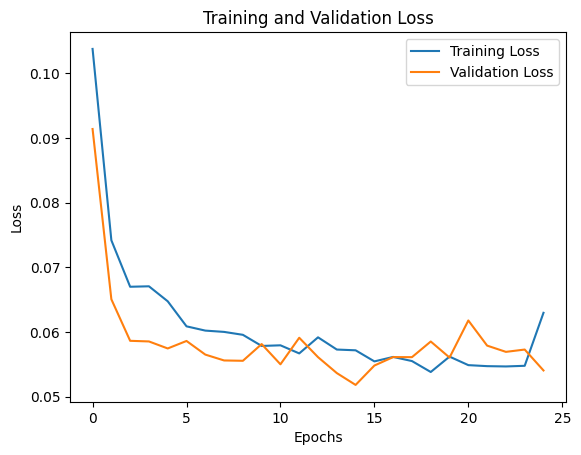

In [58]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting the training process

history_df = pd.DataFrame(fit_model.history)  # Convert the training history to a pandas DataFrame

# Increase the index by 1 to match the number of epochs
history_df.index += 1  # Adjust index to start from epoch 1 for easier visualization

# Plot the training loss over epochs
plt.plot(fit_model.history['loss'], label='Training Loss')

# Only plot validation loss if it exists in the history dictionary
if 'val_loss' in fit_model.history:
    plt.plot(fit_model.history['val_loss'], label='Validation Loss')

# Label the x-axis as "Epochs" to indicate the number of training iterations
plt.xlabel('Epochs')

# Label the y-axis as "Loss" to represent the model's loss values
plt.ylabel('Loss')

# Set a title for the plot to describe its purpose
plt.title('Training and Validation Loss')

# Display the legend to differentiate between training and validation loss curves
plt.legend()

# Show the plot
plt.show()


In [59]:
# Display the first 25 rows of the training history DataFrame to inspect loss and accuracy trends  
history_df.head(10)


,accuracy,loss,val_accuracy,val_loss
1,0.965685,0.103795,0.975556,0.091408
2,0.973465,0.074195,0.973333,0.065068
3,0.975827,0.067004,0.981111,0.058642
4,0.975966,0.067075,0.976667,0.058543
5,0.975827,0.064755,0.979444,0.057459
6,0.976799,0.060881,0.975556,0.058618
7,0.976243,0.060221,0.976667,0.056510
8,0.977494,0.060020,0.978889,0.055603
9,0.975966,0.059569,0.982222,0.055551
10,0.976799,0.057847,0.977778,0.058137


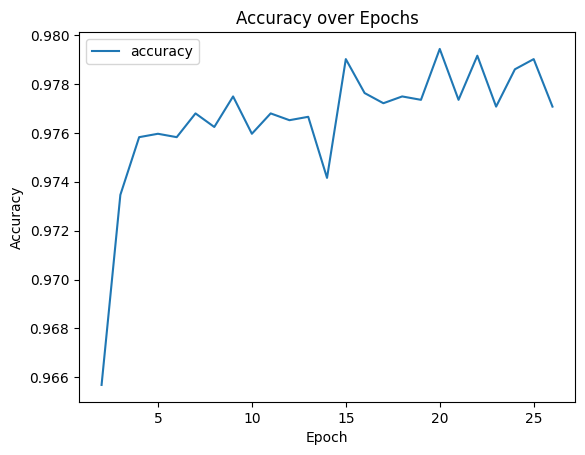

In [60]:
import matplotlib.pyplot as plt  # Import matplotlib for data visualization

# Assuming history_df is a DataFrame containing the training history

# Increase the index by 1 to match the number of epochs (starting from 1 instead of 0)
history_df.index += 1  

# Plot the accuracy over epochs
history_df.plot(y="accuracy")  # Plot the accuracy values from the training history

# Label the x-axis as "Epoch" to indicate the number of training iterations
plt.xlabel("Epoch")

# Label the y-axis as "Accuracy" to represent the model's accuracy values
plt.ylabel("Accuracy")

# Set a title for the plot to describe its purpose
plt.title("Accuracy over Epochs")

# Show the plot
plt.show()


# This defines the function do_inferencing, which takes two parameters:
* model: The trained deep learning model.
* data: The input data on which the model will make predictions.

In [61]:
def do_inferencing(model, data):
    """
    Perform inference using the trained model on the given data.

    Parameters:
    model: The trained deep learning model.
    data: The input data on which predictions will be made.

    Returns:
    predictions: The model's predicted output for the given data.
    """

    # Generate predictions using the model
    predictions = model.predict(data)

    # Return the predictions
    return predictions


In [62]:
# Generate predictions for the test dataset using the trained model
predictions = nn_model.predict(X_test_scaled)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [63]:
# Access the first prediction from the array of predictions
predictions[0]

# predictions[0] retrieves the first prediction in the array, corresponding to the first input sample in X_test_scaled.

array([-5.918914 ,  2.4085147], dtype=float32)

In [64]:
len(X_test_scaled)

3000

In [65]:
# Print a reference for class labels  
print("non-metastasis = 0, metastasis = 1")  

# Get the index of the highest value in the first prediction, representing the predicted class  
predicted_class = np.argmax(predictions[7])  

# Print the predicted class label  
print("Predicted class patient:", predicted_class)


non-metastasis = 0, metastasis = 1
Predicted class patient: 0


In [66]:
# Define the patient control list
patient_control = ["non-metastasis", "metastasis"]

# Get the actual label from y_test and make sure it's accessible in df_renamed
# Ensure the label is an integer that corresponds to the index correctly
actual_label = df_subset_2.loc[df_subset_2['patient'] == y_test[8], 'patient'].values[0]

# Get the predicted label using np.argmax for the prediction
predicted_label = patient_control[np.argmax(predictions[8])]

# Print the actual and predicted labels for patient #9
print(f"Patient #9: Actual Label = {actual_label} \t Predicted Label = {predicted_label}")


Patient #9: Actual Label = 1 	 Predicted Label = metastasis


------------------------------------

In [67]:
def do_inferencing(model, data):
    """
    Perform inference (prediction) on the given data using the provided model.
    
    Parameters:
    model (keras.Model): The trained Keras model.
    data (numpy.array or DataFrame): The input data to predict on.

    Returns:
    numpy.array: Predicted labels (or probabilities, depending on the model).
    """
    predictions = model.predict(data)  # Get predictions from the model
    predicted_classes = np.argmax(predictions, axis=1)  # Convert predictions to class labels
    return predicted_classes


In [68]:
# Assuming `nn_model` is your trained model and `X_test_scaled` is your test data
predicted_labels = do_inferencing(nn_model, X_test_scaled)

# Print out predictions for the first few test samples
print(f"Predicted labels for the first few test samples: {predicted_labels[:50]}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step
Predicted labels for the first few test samples: [1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0]


In [69]:
# Convert the predicted labels to a DataFrame
df_predictions = pd.DataFrame(predicted_labels, columns=['Predicted_Label'])

# Save DataFrame as CSV
df.to_csv("Resources/1.1predicted_labels.csv", index=False)

print("CSV file saved successfully!")


CSV file saved successfully!


In [70]:

# If you want to include the original test data in the DataFrame
# Ensure 'X_test_scaled' is a DataFrame; if it's a NumPy array, convert it
if isinstance(X_test_scaled, np.ndarray):
    # Convert NumPy array to DataFrame and assign column names
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=[f"Feature_{i}" for i in range(X_test_scaled.shape[1])])

# Concatenate the original test data with the predictions
df_predictions = pd.concat([X_test_scaled, df_predictions], axis=1)

# Display the first few rows of the DataFrame
df_predictions.head(100)


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Predicted_Label
0,-1.581332,-1.145345,-1.077447,-0.542801,0.305765,0.305765,2.148834,1
1,-0.830775,0.379667,0.538454,-0.198337,-0.314730,-0.314730,-0.624034,0
2,1.467443,-0.202029,0.407213,-0.616054,0.305765,0.305765,-0.624034,0
3,-0.927920,2.416086,2.152304,0.104281,-0.314730,-0.314730,-0.624034,0
4,-0.297059,0.372396,0.423618,0.506128,-0.624978,-0.624978,-0.624034,0
...,...,...,...,...,...,...,...,...
95,1.654793,-0.413378,-0.021369,0.542211,0.616013,0.616013,-0.624034,0
96,1.675898,-1.469156,-1.536789,2.140328,3.097996,3.097996,0.762400,1
97,-1.422894,0.148928,-0.175167,-0.383348,-0.624978,-0.624978,0.762400,1
98,-1.072480,-0.340182,-0.757547,-1.493335,1.236509,1.236509,0.762400,1


In [71]:
df_predictions.columns

Index(['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Predicted_Label'],
      dtype='object')

In [72]:
# Save df_predictions to a CSV file
df_predictions.to_csv("Resources/3.0df_predictions.csv", index=False)

print("CSV file saved successfully!")


CSV file saved successfully!


In [73]:
# Assuming df is your DataFrame and 'Predicted_Label' is the column
predicted_labels = df_predictions['Predicted_Label']

# If you want to view the first few predicted labels
print(predicted_labels.head(2500))
predicted_labels.info()

0       1
1       0
2       0
3       0
4       0
       ..
2495    1
2496    1
2497    1
2498    0
2499    0
Name: Predicted_Label, Length: 2500, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 3000 entries, 0 to 2999
Series name: Predicted_Label
Non-Null Count  Dtype
--------------  -----
3000 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB


In [74]:
# Convert NumPy array to Pandas DataFrame
df = pd.DataFrame(predicted_labels, columns=["Predicted_Label"])

# Save DataFrame as CSV
df.to_csv("Resources/1.1predicted_labels.csv", index=False)

print("CSV file saved successfully!")

CSV file saved successfully!


-------------------------------------

In [75]:
# Check for duplicate column names
if df_predictions.columns.duplicated().any():
    print("Duplicate columns found!")
    # Rename or drop duplicates
    df_predictions = df_predictions.loc[:, ~df_predictions.columns.duplicated()]

# Now, try to create the DataFrame with the 'Predicted_Label' column
if 'Predicted_Label' in df_predictions.columns:
    predicted_labels_df = pd.DataFrame(df_predictions, columns=['Predicted_Label'])
else:
    print("Column 'Predicted_Label' not found! Check column names.")

# Display the new DataFrame
print(predicted_labels_df.head(250))


     Predicted_Label
0                  1
1                  0
2                  0
3                  0
4                  0
..               ...
245                0
246                0
247                1
248                0
249                0

[250 rows x 1 columns]


In [76]:
# Extract the 'Predicted_Label' column from the 'df_predictions' DataFrame
# and convert it into a NumPy array.
# The 'values' attribute gets the underlying data as an array, without the column labels.
predicted_labels_array = df_predictions['Predicted_Label'].values

# Display the array of predicted labels.
predicted_labels_array


array([1, 0, 0, ..., 1, 1, 0])

In [77]:
# Assuming df_predictions is a Pandas Series (single column)
unique_values = predicted_labels.unique()

# Print the unique values
print(unique_values)


[1 0]


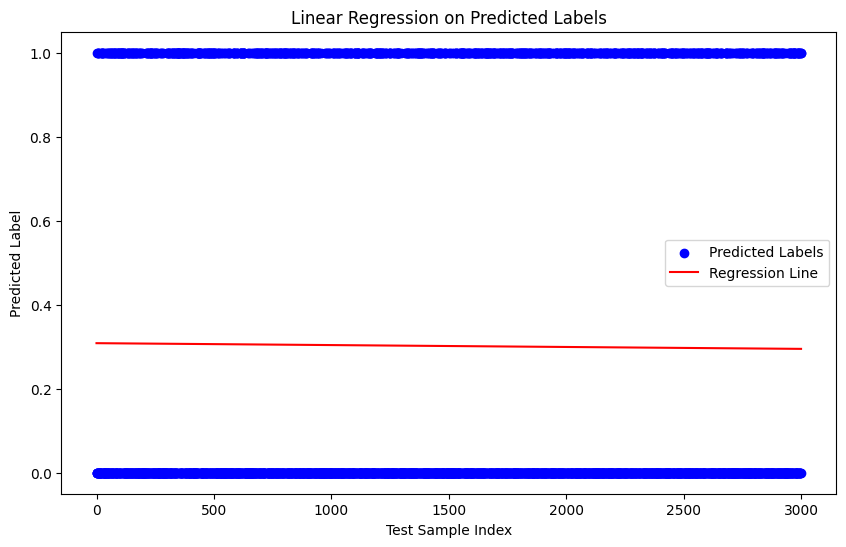

In [78]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming df_predictions has the predicted labels in 'Predicted_Label'

# Reshape the data for linear regression (X needs to be 2D, y is 1D)
X = df_predictions.index.values.reshape(-1, 1)  # Use the index (sample number) as X
y = df_predictions['Predicted_Label'].values  # Use the predicted labels as y

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values based on the regression model
y_pred = model.predict(X)

# Plot the original data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', label='Predicted Labels')  # Plot the original data points
plt.plot(X, y_pred, color='r', label='Regression Line')  # Plot the regression line

# Customize the plot
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted Label')
plt.title('Linear Regression on Predicted Labels')
plt.legend()

# Show the plot
plt.show()


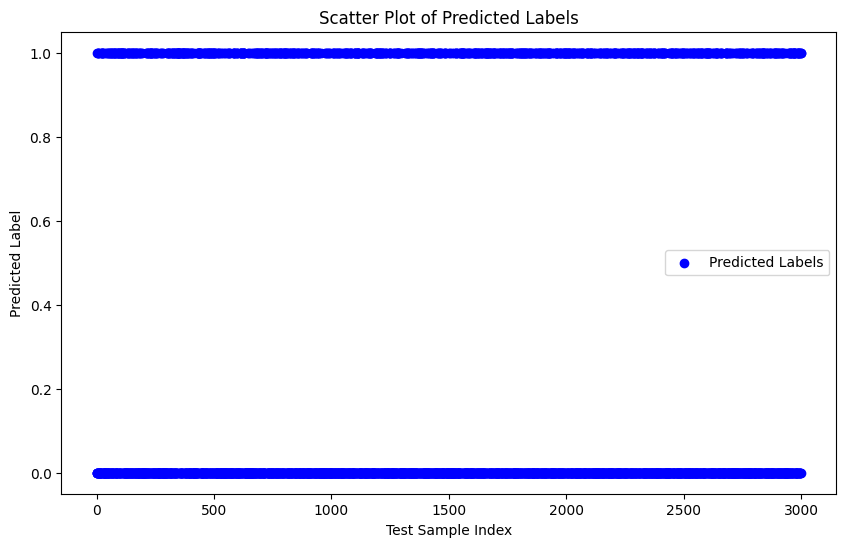

In [79]:
import matplotlib.pyplot as plt

# Assuming df_predictions has the predicted labels in 'Predicted_Label'

# Create a scatter plot of the predicted labels against the sample index
plt.figure(figsize=(10, 6))

# Scatter plot of the predicted labels
plt.scatter(df_predictions.index, df_predictions['Predicted_Label'], color='b', label='Predicted Labels')

# Customize the plot
plt.xlabel('Test Sample Index')  # Label for the x-axis
plt.ylabel('Predicted Label')    # Label for the y-axis
plt.title('Scatter Plot of Predicted Labels')  # Title for the plot
plt.legend()

# Show the plot
plt.show()


# Note: More visual prediction with the dataset df_predictions in the noteboook 1.1